In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statistics
import statsmodels.api as sm
from scipy import optimize

In [2]:
%config InlineBackend.figure_format = 'retina'
RANDOM_SEED = 8927
rng = np.random.default_rng(RANDOM_SEED)
az.style.use("arviz-darkgrid")
sns.set_theme(palette="colorblind")

In [3]:
kidiq = pd.read_stata("../data/kidiq.dta")
kidiq.head() 


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1.0,121.117529,4,27
1,98,1.0,89.361882,4,25
2,85,1.0,115.443165,4,27
3,83,1.0,99.449639,3,25
4,115,1.0,92.745710,4,27


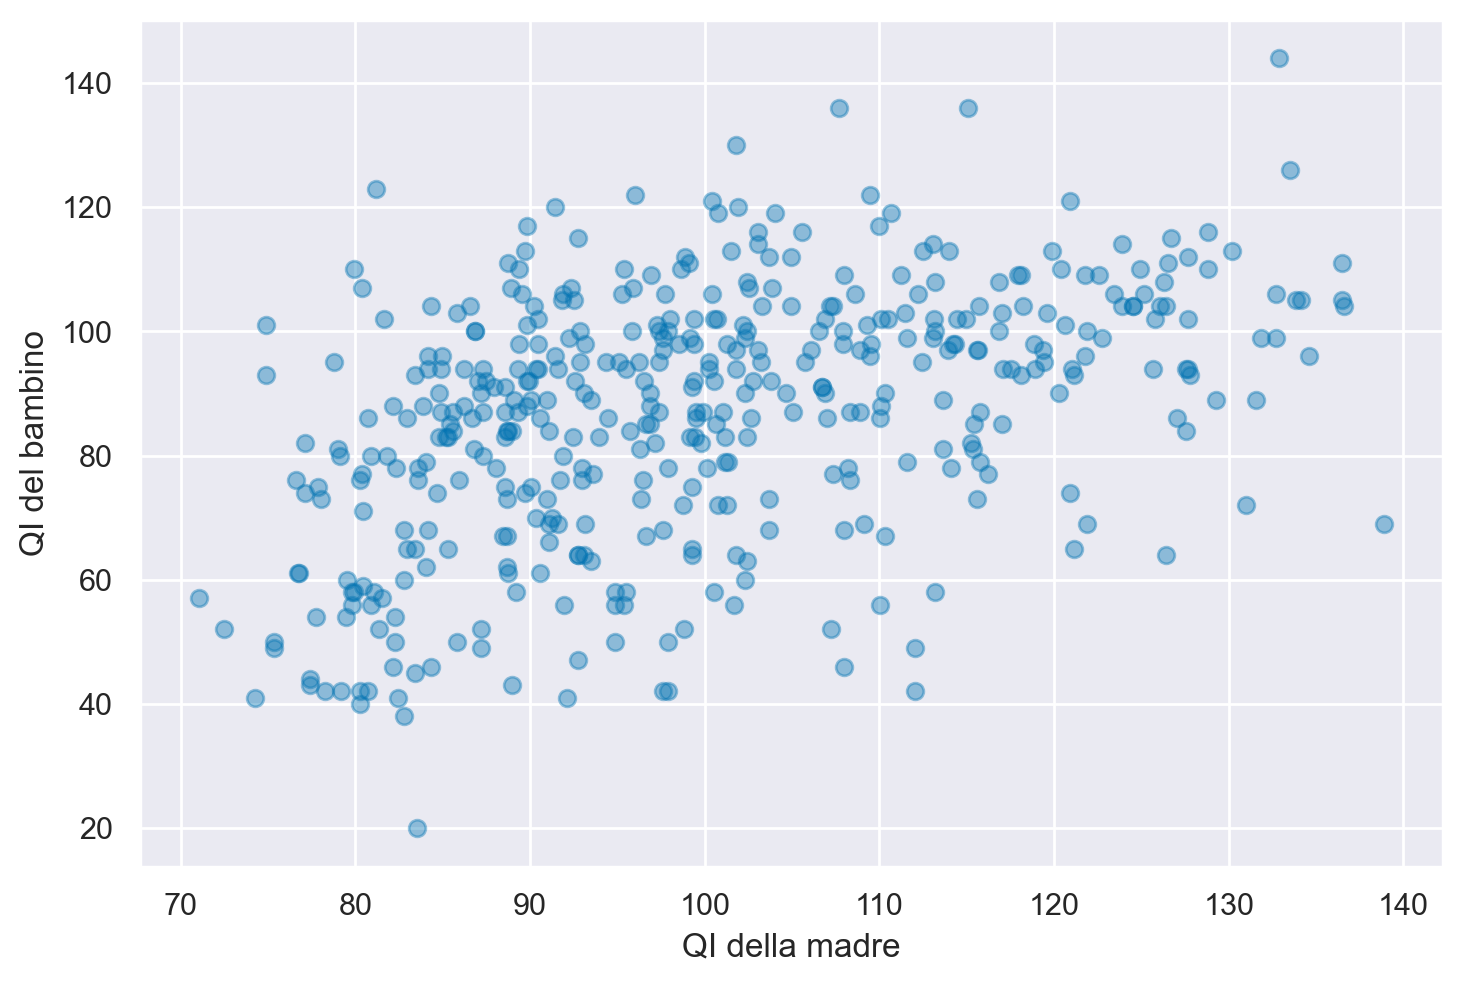

In [4]:
_, ax = plt.subplots()
ax.plot(kidiq["mom_iq"], kidiq["kid_score"], "o", alpha=0.4)
ax.set_xlabel("QI della madre")
_ = ax.set_ylabel("QI del bambino")

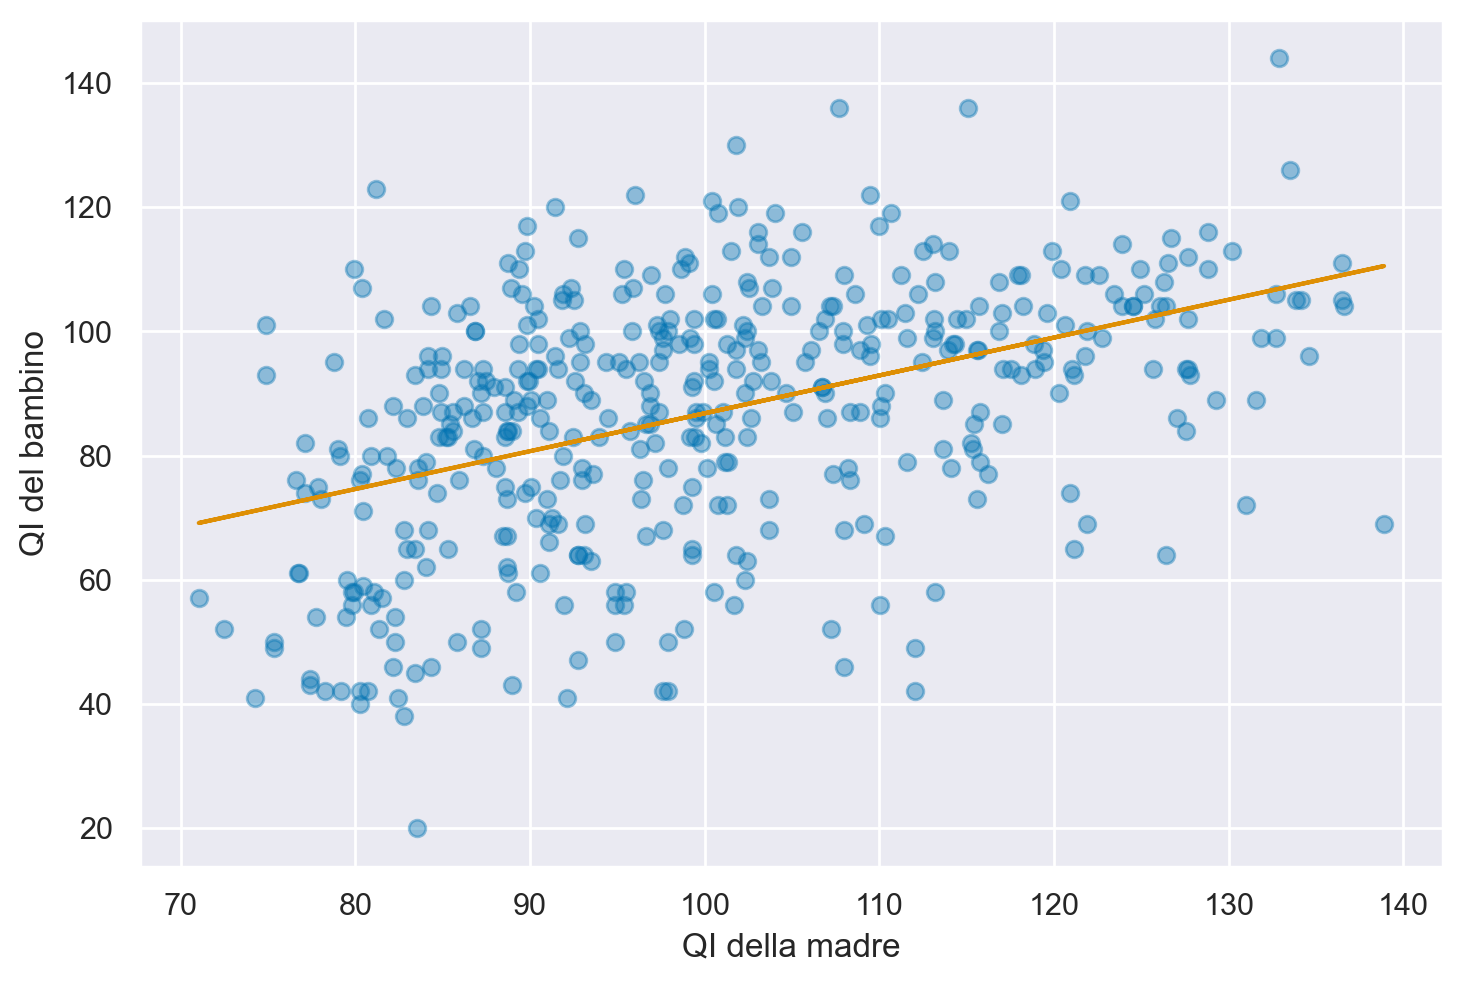

In [5]:
_, ax = plt.subplots()
ax.plot(kidiq["mom_iq"], kidiq["kid_score"], "o", alpha=0.4)
# obtain m (slope) and b(intercept) of linear regression line
b, a = np.polyfit(kidiq["mom_iq"], kidiq["kid_score"], 1)
# add linear regression line to scatterplot
plt.plot(kidiq["mom_iq"], a + b * kidiq["mom_iq"])
ax.set_xlabel("QI della madre")
_ = ax.set_ylabel("QI del bambino")


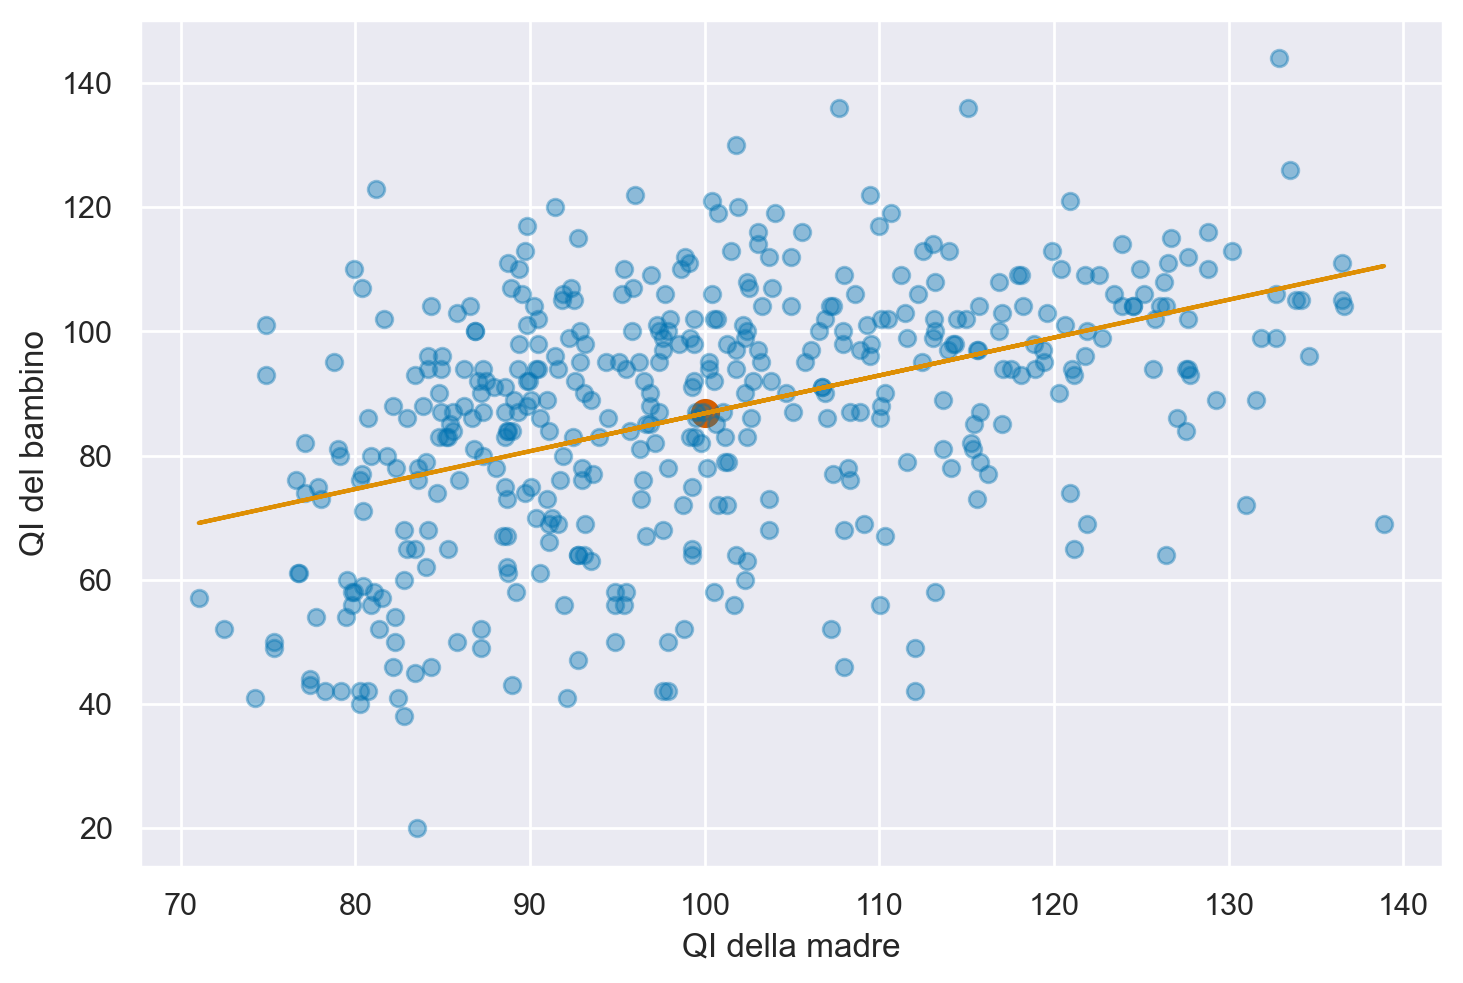

In [6]:
_, ax = plt.subplots()
ax.plot(kidiq["mom_iq"], kidiq["kid_score"], "o", alpha=0.4)
# obtain m (slope) and b(intercept) of linear regression line
b, a = np.polyfit(kidiq["mom_iq"], kidiq["kid_score"], 1)
# add linear regression line to scatterplot
plt.plot(kidiq["mom_iq"], a + b * kidiq["mom_iq"])
plt.scatter([np.mean(kidiq.mom_iq)], [np.mean(kidiq.kid_score)], s=90, c="r")
ax.set_xlabel("QI della madre")
_ = ax.set_ylabel("QI del bambino")

In [7]:
kidiq["kid_score"][0:10]

0     65
1     98
2     85
3     83
4    115
5     98
6     69
7    106
8    102
9     95
Name: kid_score, dtype: int32

In [8]:
print(kidiq["kid_score"][2])

85


In [9]:
cov_xy = np.cov(kidiq["kid_score"], kidiq["mom_iq"], ddof=1)[0][1]
var_x = np.var(kidiq["mom_iq"], ddof=1)
b = cov_xy / var_x
b

0.6099745717307857

In [10]:
a = np.mean(kidiq["kid_score"]) - b * np.mean(kidiq["mom_iq"])
a

25.799777849962908

In [11]:
def func(x, a, b):
    y = a + b*x
    return y
  
optimize.curve_fit(func, xdata = kidiq.mom_iq, ydata = kidiq.kid_score)[0]

array([25.79977774,  0.60997457])

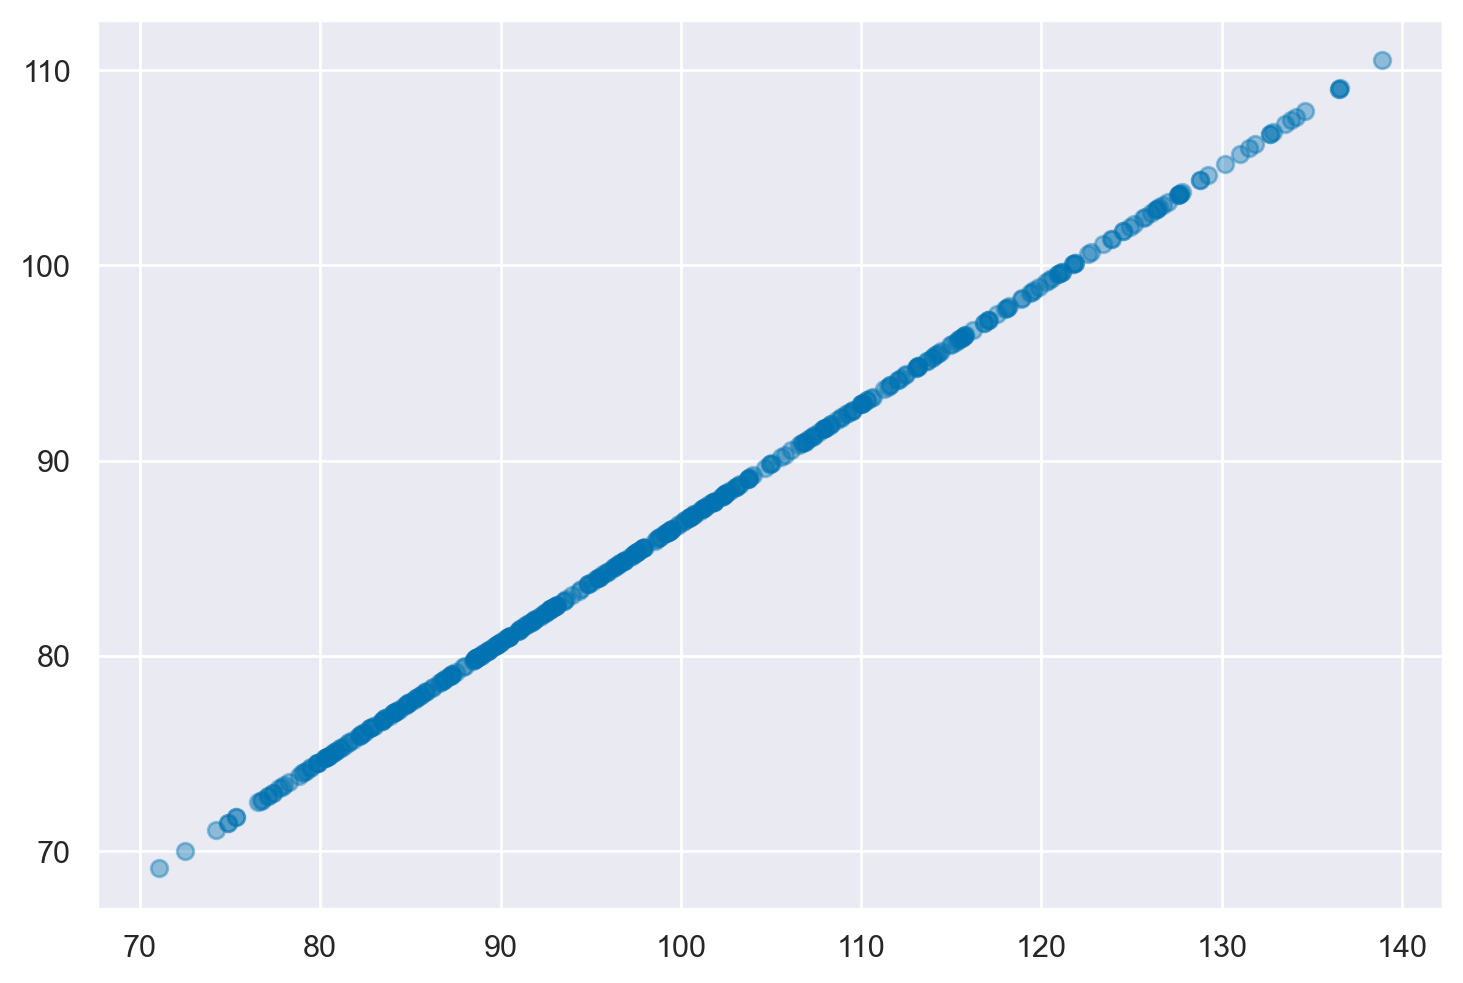

In [12]:
_, ax = plt.subplots()
_ = ax.plot(kidiq["mom_iq"], a + b * kidiq["mom_iq"], "o", alpha=0.4)

In [13]:
print(kidiq["kid_score"][0])

65


In [14]:
kidiq["mom_iq"][0]

121.11752860260343

In [15]:
a + b * kidiq["mom_iq"][0]

99.67839048842713

In [16]:
kidiq["kid_score"][0] - (a + b * kidiq["mom_iq"][0])

-34.67839048842713

In [17]:
res = kidiq["kid_score"] - (a + b * kidiq["mom_iq"])
res

0     -34.678390
1      17.691747
2     -11.217173
3      -3.461529
4      32.627697
         ...    
429    16.427159
430    -6.521552
431   -33.661788
432     3.120144
433   -11.461993
Length: 434, dtype: float64

In [18]:
np.sum(res)

-3.069544618483633e-12

In [19]:
pd.DataFrame(
    {
        "kid_score": kidiq["kid_score"],
        "mom_iq": kidiq["mom_iq"],
        "y_hat": a + b * kidiq["mom_iq"],
        "e": kidiq["kid_score"] - (a + b * kidiq["mom_iq"]),
        "y_hat + e": (a + b * kidiq["mom_iq"])
        + (kidiq["kid_score"] - (a + b * kidiq["mom_iq"])),
    }
).head()

,kid_score,mom_iq,y_hat,e,y_hat + e
0,65,121.117529,99.678390,-34.678390,65.0
1,98,89.361882,80.308253,17.691747,98.0
2,85,115.443165,96.217173,-11.217173,85.0
3,83,99.449639,86.461529,-3.461529,83.0
4,115,92.745710,82.372303,32.627697,115.0


In [20]:
kidiq["xd"] = kidiq["mom_iq"] - np.mean(kidiq["mom_iq"])
kidiq

,kid_score,mom_hs,mom_iq,mom_work,mom_age,xd
0,65,1.0,121.117529,4,27,21.117529
1,98,1.0,89.361882,4,25,-10.638118
2,85,1.0,115.443165,4,27,15.443165
3,83,1.0,99.449639,3,25,-0.550361
4,115,1.0,92.745710,4,27,-7.254290
...,...,...,...,...,...,...
429,94,0.0,84.877412,4,21,-15.122588
430,76,1.0,92.990392,4,23,-7.009608
431,50,0.0,94.859708,2,24,-5.140292
432,88,1.0,96.856624,2,21,-3.143376


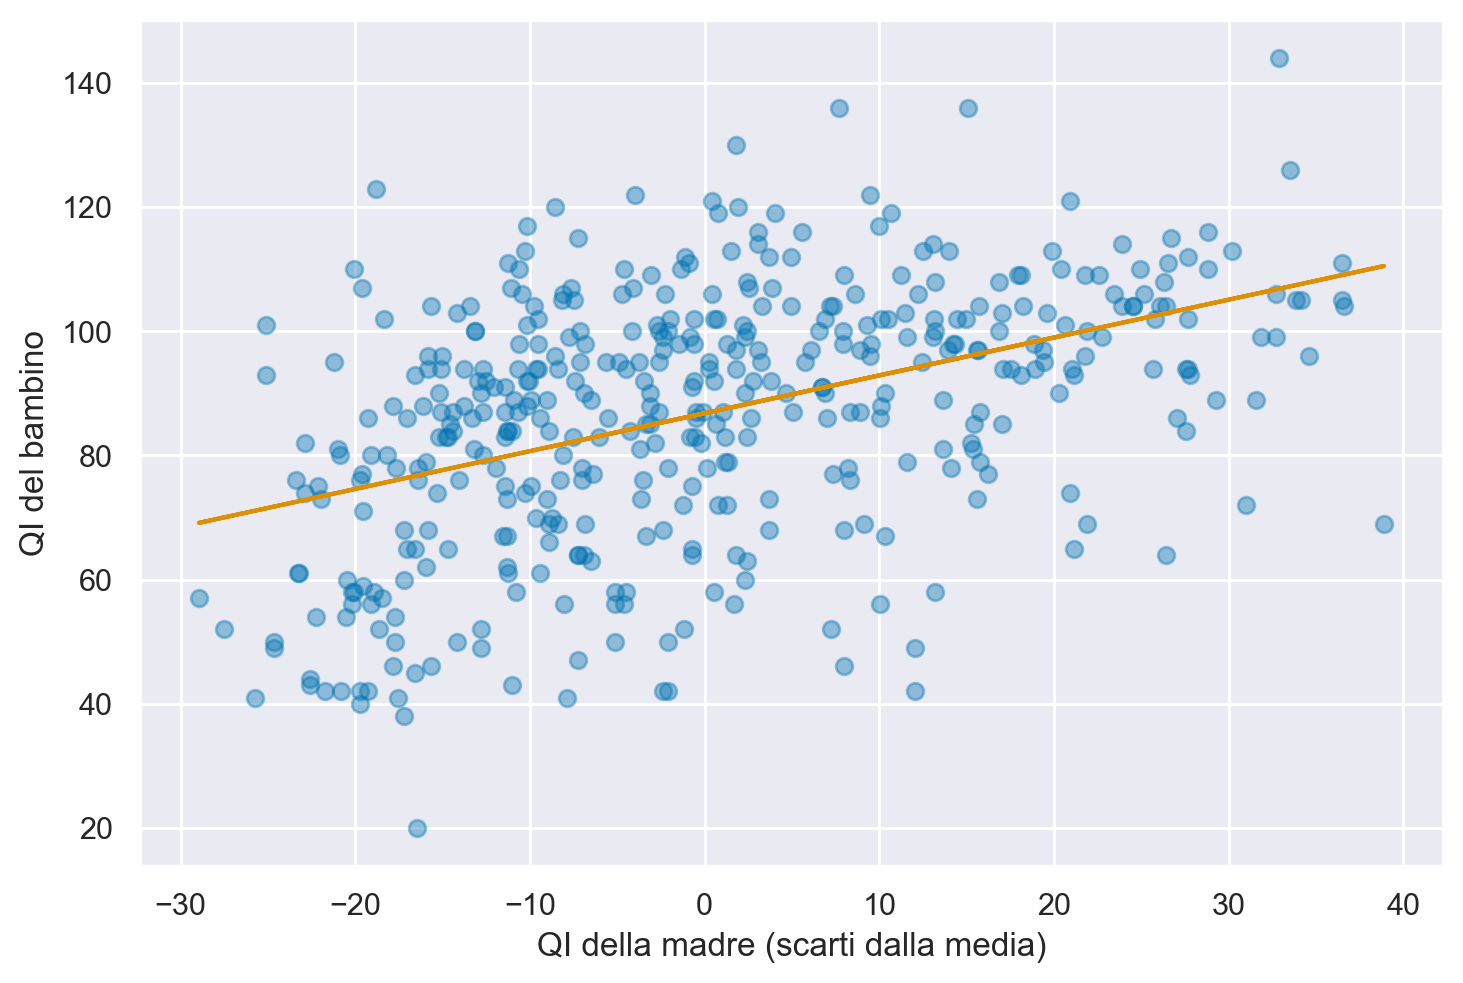

In [21]:
_, ax = plt.subplots()
ax.plot(kidiq["xd"], kidiq["kid_score"], "o", alpha=0.4)
b, a = np.polyfit(kidiq["xd"], kidiq["kid_score"], 1)
plt.plot(kidiq["xd"], a + b * kidiq["xd"])
ax.set_xlabel("QI della madre (scarti dalla media)")
_ = ax.set_ylabel("QI del bambino")

In [22]:
result = stats.linregress(kidiq.xd, kidiq.kid_score)
result.intercept, result.slope

(86.79723502304148, 0.6099745717307857)

In [23]:
b_grid = np.linspace(0, 1, 1001)

In [24]:
def sse(a, b, x, y):
    return np.sum((y - (a + b * x)) ** 2)

In [25]:
a = 25.79978
sse_vals = [sse(a, b, kidiq["mom_iq"], kidiq["kid_score"]) for b in b_grid]

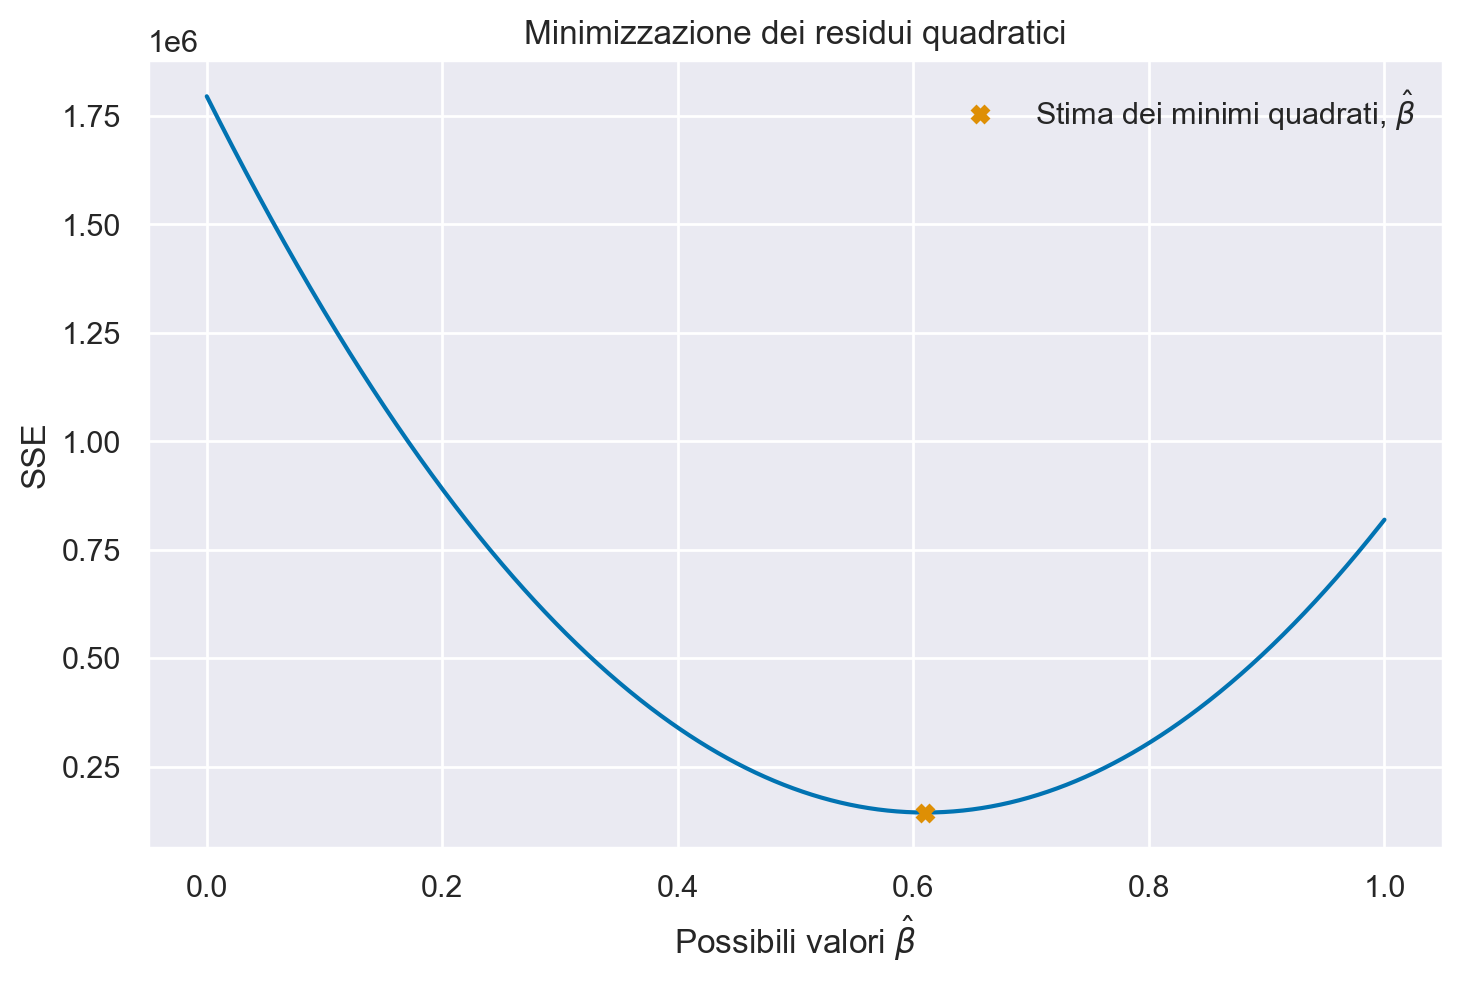

In [26]:
plt.plot(b_grid, sse_vals, '-')
plt.plot(
    b_grid[np.argmin(sse_vals)], sse_vals[np.argmin(sse_vals)],
    'X', label=r'Stima dei minimi quadrati, $\hat \beta$'
)
plt.ylabel('SSE')
plt.xlabel(fr'Possibili valori $\hat \beta$')
plt.title(f'Minimizzazione dei residui quadratici')
plt.legend()
plt.show()

In [27]:
b_grid[np.argmin(sse_vals)]

0.61

In [28]:
e = kidiq.kid_score - (a + b * kidiq.mom_iq)
e[0:10]

0   -34.678393
1    17.691744
2   -11.217175
3    -3.461531
4    32.627695
5     6.382843
6   -41.521043
7     3.864879
8    26.414384
9    11.208066
dtype: float64

In [29]:
np.mean(np.abs(e))

14.468602675472287

In [30]:
np.sqrt(sum(e**2) / (len(e) - 2))

18.266122792299402

In [31]:
dev_t = np.sum((kidiq.kid_score - np.mean(kidiq.kid_score)) ** 2)
dev_t

180386.15668202768

In [32]:
dev_r = np.sum(((a + b * kidiq.mom_iq) - np.mean(kidiq.kid_score)) ** 2)
dev_r

36248.82019706027

In [33]:
R2 = dev_r / dev_t
round(R2, 3)

0.201

In [34]:
X = sm.add_constant(kidiq["mom_iq"])
mod = sm.OLS(kidiq["kid_score"], X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:              kid_score   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     108.6
Date:                Sun, 16 Jun 2024   Prob (F-statistic):           7.66e-23
Time:                        09:52:25   Log-Likelihood:                -1875.6
No. Observations:                 434   AIC:                             3755.
Df Residuals:                     432   BIC:                             3763.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.7998      5.917      4.360      0.0

In [35]:
%load_ext watermark
%watermark -n -u -v -iv -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

pandas     : 2.2.2
statsmodels: 0.14.2
arviz      : 0.18.0
numpy      : 1.26.4
scipy      : 1.13.1
matplotlib : 3.8.4
seaborn    : 0.13.2

